<a href="https://colab.research.google.com/github/hirossk/0809python/blob/main/0809Pillow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythonで画像加工

Pythonで画像を編集するには描画のために座標軸について確認しましょう。

(Python Imaging Library、PIL)に関しては次のサイトが見やすいかもしれません。

参考
https://note.nkmk.me/pillow/

他にも参考になるサイトがあると思います。
「pillow プログラミング 解説」等で検索して詳細をご確認ください。

## 描画座標軸について

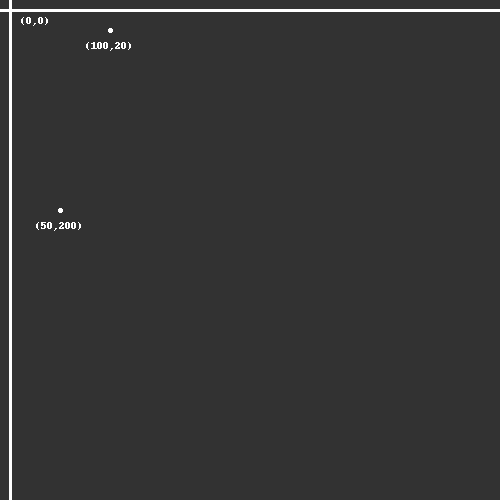

In [ ]:
from PIL import Image, ImageDraw

# 描画用のエリアを作成します。
image = Image.new('RGB', (500, 500), (50, 50, 50))
# 描画用のエリアに描画するための機能を取り出します。
draw = ImageDraw.Draw(image)

# 基準点の描画
draw.line((0,10,499,10),width=3,fill=(255,255,255))
draw.line((10,0,10,499),width=3,fill=(255,255,255))
# 基準点座標の描画
draw.text((20,15),text = "(0,0)")

# 指定の座標にマーキングする
draw.ellipse((108,28,112,32),width = 3)
draw.text((85,40),text = "(100,20)")

# 指定の座標にマーキングする
draw.ellipse((58,208,62,212),width = 3)
draw.text((35,220),text = "(50,200)")

# 指定の座標にマーキングする
# draw.ellipse((308,308,312,312),width = 3)
# draw.text((285,320),text = "(300,300)")

display(image)


## 図形描画
PILライブラリとは画像処理ライブラリ（Pillow）のことを指しています。
Pillowを使うと図形描画や画像加工が容易にできます。

初めに円（楕円）を描画してみましょう。

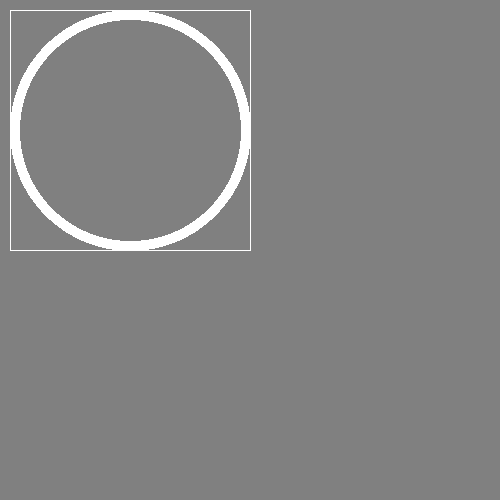

In [ ]:
from PIL import Image, ImageDraw

image = Image.new('RGB', (500, 500), (128, 128, 128))
draw = ImageDraw.Draw(image)

draw.rectangle((10,10,250,250))
# 繰り返しを入れることで多くの画像を作成できます。
# これは円を描画します
draw.ellipse((10,10,250,250),width = 10)

display(image)

## 色の設定

PythonのPillowライブラリを使って色の指定をするには（赤、緑、青）の順で各色の強さを指定する必要があります。

In [ ]:
from PIL import Image, ImageDraw

image = Image.new('RGB', (500, 500), (128, 128, 128))
draw = ImageDraw.Draw(image)

# 輪郭のみ
draw.ellipse((10,10,240,240),width = 3,outline =(244,10,100))
# 塗りつぶし　fillの部分を変えると色を変更することができます
draw.ellipse((240,240,490,490),width = 3,fill =(244,10,255))

# 繰り返しを使うと・・
for i in range(0, 240, 10):
    draw.ellipse((240+i/2,240+i/2,490-i/2,490-i/2),width = 3,fill =(244 - i,i,100))

display(image)

### 多角形を描画してみましょう。


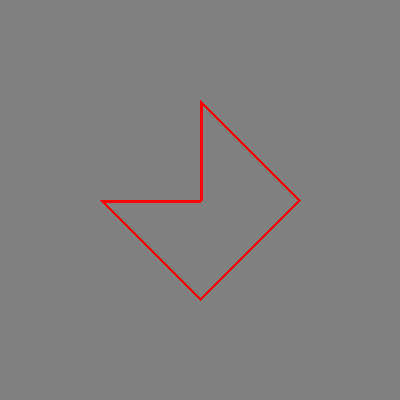

In [ ]:
from PIL import Image, ImageDraw

image = Image.new('RGB', (400, 400), (128, 128, 128))
draw = ImageDraw.Draw(image)

points = [(100,200),(200,300),(300,200),(200,100),(200,200)]

# 多角形を描画します。
draw.polygon(points,width = 3,outline = (255,0,0))

# 各座標をリストから取り出して描画します。
# for xy in points:
#   # 座標の表示位置を調整しています。
#   plot = (xy[0] - 33,xy[1] +8)
#   draw.text(plot,str(xy))

display(image)

### その他の描画関数を調べてみましょう。


表示している図形を回転させてみましょう。


45度右に回転した図形


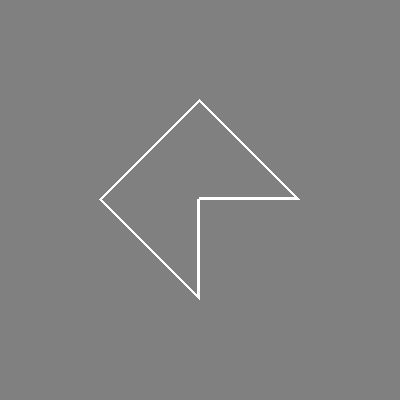

In [ ]:
from PIL import Image, ImageDraw

image = Image.new('RGB', (400, 400), (128, 128, 128))
draw = ImageDraw.Draw(image)

points = [(100,200),(200,300),(300,200),(200,100),(200,200)]

draw.polygon(points,width = 3)

# 45度回転します。角度を変更すると図形の傾きが変えられます。
# 回転した画像全体を残したい場合は引数expandをTrueにします。
image = image.rotate(180,expand = True)
print('45度右に回転した図形')
display(image)
# x度回転します。
# 回転した画像全体を残したい場合は引数expandをTrueにします。
# x = 90
# image = image.rotate(x,expand = True)
# print('さらに' + x + '度右に回転した図形')
# display(image)

拡大処理・縮小処理

45度回転した図形


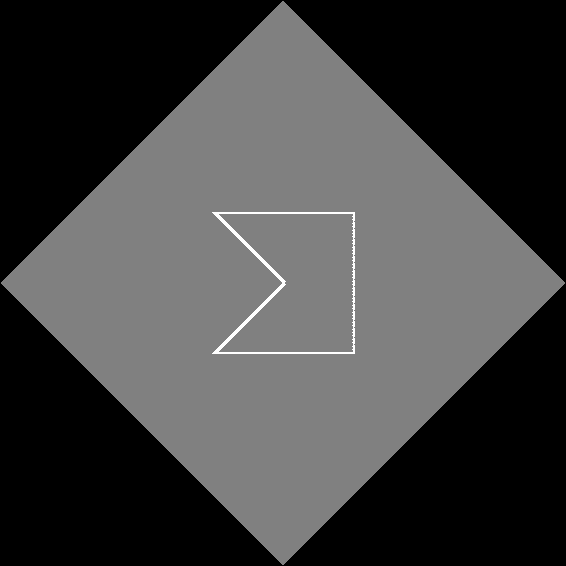

さらに90度回転した図形


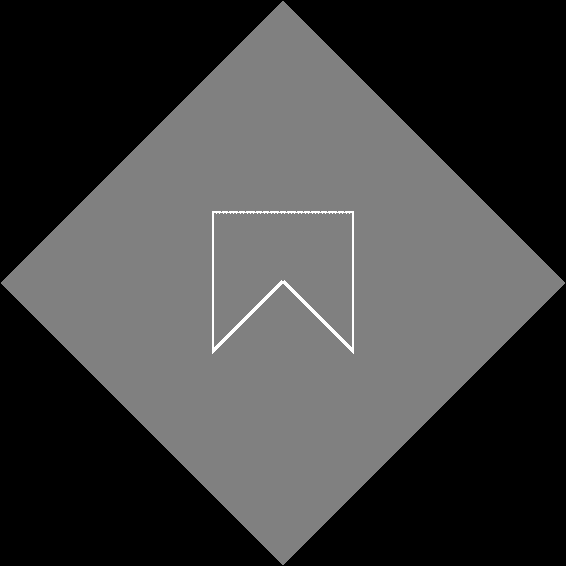

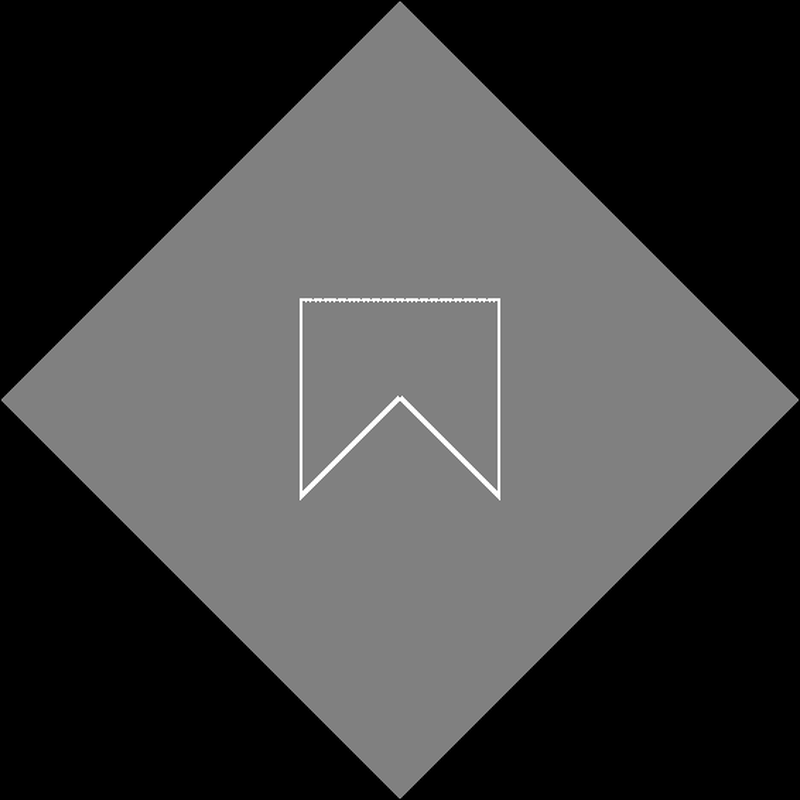

In [ ]:
from PIL import Image, ImageDraw

image = Image.new('RGB', (400, 400), (128, 128, 128))
draw = ImageDraw.Draw(image)

points = [(100,200),(200,300),(300,200),(200,100),(200,200)]

draw.polygon(points,width = 3)
# 45度回転します。
# 回転した画像全体を残したい場合は引数expandをTrueにします。
image = image.rotate(45,expand = True)
print('45度回転した図形')
display(image)
# 90度回転します。
# 回転した画像全体を残したい場合は引数expandをTrueにします。
image = image.rotate(90,expand = True)
print('さらに90度回転した図形')
display(image)

# 指定のサイズに大きさを変更します。
image = image.resize(size=(800,800), resample=Image.LANCZOS)

display(image)

### 写真の読み込み

Colaboratoryにフォルダーを作成しイメージをアップロードしましょう。

どこに写真があるのか確認してみましょう。

Colaboratoryに写真ファイルを追加してみましょう。

In [ ]:
!dir

sample_data


## 写真を一括返還
### Colaboratoryにアップロードした写真を一括で変換することができます。


まずはどのような写真がアップロードされているのか見てみましょう。

In [ ]:
import glob
from PIL import Image
# パス内の全ての"指定パス+ファイル名"と"指定パス+ディレクトリ名"を要素とするリストを返す
files = glob.glob('img/*.webp') # ワイルドカードが使用可能

# すべてのファイルを繰り返し読み込み表示します。
for file in files:
    image = Image.open(file)
    display(image)

写真のサイズを縮小して中央部分（一部分）のみ切り抜き（クロップし）ます。

仮に800x600のピクセルサイズの画像があればこれを短い辺の長さを300に縮小してみます。

In [ ]:
from PIL import Image, ImageDraw

# 横800x高さ600のイメージを生成
image = Image.new('RGB', (800, 600), (128, 128, 128))
draw = ImageDraw.Draw(image)

# 適当な大きさの円を各
draw.ellipse((200,100,600,500),width = 3,outline =(244,10,100))
# 元の図を表示します。
print("元の図")
display(image)

# 短い辺を600 ⇒ 300にするため　300 / 600 ⇒ 1　/　2（0.5）を幅、高さに掛ける
# この時エラーが発生します。
#resizeimage = image.resize((800 * 0.5 , 600 * 0.5))
#resizeimage = image.resize((int(800 * 0.5) ,int( 600 * 0.5)))

# 縮小後の図を表示します。
#print("縮小後")
#display(resizeimage)

# 縮小後の図の不要部分を色分けします。（わかりやすくしているだけなので本来不要です。）
#resizedraw = ImageDraw.Draw(resizeimage)
#resizedraw.rectangle((0, 0, 49, 299),fill=(255, 0, 0))
#resizedraw.rectangle((350, 0, 399, 299),fill=(255, 0, 0))
#print("不要部分を赤くした")
#display(resizeimage)


# 幅高さ300,300で図の中央の一部をくり抜き（crop）ます。
# 縮小後のサイズが400,300になっているので中央部分は50-349,0-299になっています。
#cropimage = resizeimage.crop((50, 0, 349, 299))

#print("くり抜き後のイメージ")
#display(cropimage)

image = image.resize((300,300))


画像をフィルタリングするためのイメージを作成します。

In [ ]:
from PIL import Image,ImageDraw
whsize = 300

# イメージの周辺をぼかすための画像を作成する。
im_alpha = Image.new('L', (whsize,whsize), 0)
draw = ImageDraw.Draw(im_alpha)
draw.ellipse((20, 20, whsize - 20, whsize - 20), fill=255)

display(im_alpha)

輪郭をぼかすためにグラデーションします。

In [ ]:
from PIL import Image,ImageDraw,ImageFilter

# 周辺をぼかす処理を入れます。数値は幅を表します。
im_alpha_blur = im_alpha.filter(ImageFilter.GaussianBlur(10))
display(im_alpha_blur)

アルファチャンネルとは、画像データなどの色情報の一部として、その画素の透過度（背後の色が透き通る度合い）を設定できるようにした領域を言います。「ぼかす」ことができます。ぼかしの透明度は256段階となります。

In [ ]:
# 先ほど最後に作成した画像にアルファチャネル処理をします。

image.putalpha(im_alpha_blur)
display(image)

すべてのイメージの長編300ピクセルにして中央でクロップするし表示するプログラムを見てみましょう。

In [ ]:
import glob
from PIL import Image
whsize = 300
# パス内の全ての"指定パス+ファイル名"と"指定パス+ディレクトリ名"を要素とするリストを返す
files = glob.glob('img/*.jpg') # ワイルドカードが使用可能
# すべてのファイルに対して処理を行います。
for file in files:
    image = Image.open(file)
    # 画像のサイズを取得
    w,h = image.size
    # 縦横の小さいほうをwhsizeで指定したピクセルにします。
    if w < h :
      w = int(w * whsize / w)
      h = int(h * whsize / w)
    else:
      w = int(w * whsize / h)
      h = int(h * whsize / h)
    # 大きさを縦横を同じ比率で縮小します。
    image = image.resize((w,h))

    w,h = image.size
    print(w,h)
    # サイズ変更した写真の中央部分をくりぬき（クロップ）します。
    image = image.crop(((w - whsize)/2,(h-whsize)/2,
            (w - whsize)/2 + whsize,(h-whsize)/2 + whsize))
    w,h = image.size
    print(w,h)
    display(image)

それではこれらの処理をまとめて記述してみましょう。


In [ ]:
import glob
from PIL import Image,ImageDraw,ImageFilter
whsize = 300
# アルファチャネルを先に作成しておきます。
# イメージの周辺をぼかすための画像を作成する。
im_alpha = Image.new('L', (whsize,whsize), 0)
draw = ImageDraw.Draw(im_alpha)
draw.ellipse((20, 20, whsize - 20, whsize - 20), fill=255)
im_alpha_blur = im_alpha.filter(ImageFilter.GaussianBlur(10))

# パス内の全ての"指定パス+ファイル名"と"指定パス+ディレクトリ名"を要素とするリストを返す
files = glob.glob('img/*.webp') # ワイルドカードが使用可能
# すべてのファイルに対して処理を行います。
for file in files:
    image = Image.open(file)
    # 画像のサイズを取得
    w,h = image.size
    # 縦横の小さいほうをwhsizeで指定したピクセルにします。
    if w < h :
      w = int(w * whsize / w)
      h = int(h * whsize / w)
    else:
      w = int(w * whsize / h)
      h = int(h * whsize / h)
    # 大きさを縦横を同じ比率で縮小します。
    image = image.resize((w,h))

    w,h = image.size
    print(w,h)
    # サイズ変更した写真の中央部分をくりぬき（クロップ）します。
    image = image.crop(((w - whsize)/2,(h-whsize)/2,
            (w - whsize)/2 + whsize,(h-whsize)/2 + whsize))
    w,h = image.size
    print(w,h)

    # 各画像にアルファ処理をします。
    image.putalpha(im_alpha_blur)

    # 表示します。
    display(image)
    # ファイル名の拡張子をjpgからpngに変換します。
    file = file.replace('.jpg','.png')
    # 保存します。
    image.save(file)

## おまけ

絵をかいてみました。

In [ ]:
from IPython.display import display
from PIL import Image,ImageDraw

im = Image.new('RGB', (500, 500),(255,240,230))
#背景をクリーム色で描画用のエリアを作成します。

draw = ImageDraw.Draw(im)
black=( 0 , 0 , 0 )
draw.ellipse((100,100,400,400),fill=(230,150,110))
draw.ellipse((190,155,220,210),fill=black)
draw.ellipse((280,155,310,210),fill=black)
draw.ellipse((200,210,300,290),fill=(230,50,12))
draw.rectangle((250,230,270,250),fill=(255,255,255))

draw.arc((150,140,260,250),-120,-60,fill=black,width=5)
draw.arc((240,140,350,250),-120,-60,fill=black,width=5)

draw.chord((190,240,310,350),start=-10,end=190,fill=(210,80,82))

display(im)
